In [20]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/advertisingcsv/Advertising.csv


# Linear model 

The linear model either assumes that the regression function $E(Y|X)$ is linear, or that the linear model is a reasonable approximation.Here the $\beta_j$'s are unknown parameters or coefficients, and the variables $X_j$ can come from different sources. No matter the source of $X_j$, the model is linear in the parameters.

**Simple Linear Regression**: <h5 align=center>$$Y = \beta_0 + \beta_1 X + \epsilon$$</h5>

**Multiple Linear Regression**: <h5 align=center>$$Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 +...+ \beta_p X_p + \epsilon$$ </h5>
<h5 align=center> $$sales = \beta_0 + \beta_1 \times TV + \beta_2 \times radio + \beta_3 \times newspaper + \epsilon$$ </h5>

# Task 1: Importing Libraries

In [21]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import skew
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from yellowbrick.regressor import PredictionError, ResidualsPlot
from statsmodels.stats.outliers_influence import variance_inflation_factor


plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = (12,8)

# https://www.scikit-yb.org/en/latest/api/regressor/peplot.html

# Task 2: Load the Data

https://www.kaggle.com/ishaanv/ISLR-Auto?select=Advertising.csv

The adverstiting dataset captures sales revenue generated with respect to advertisement spends across multiple channles like radio, tv and newspaper.


The dataset contains statistics about the sales of a product in 200 different markets, together with advertising budgets in each of these markets for different media channels: TV, radio and newspaper.
    
The sales are in thousands of units and the budget is in thousands of dollars (TV, radio, newspaper).

In [22]:
advert_df = pd.read_csv('../input/advertisingcsv/Advertising.csv')
advert_df.drop('Unnamed: 0', inplace=True, axis=1)
advert_df.columns = advert_df.columns.str.lower()
advert_df.head()

,tv,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [23]:
advert_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   tv         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


# Task 3: Relationship between Features and Response

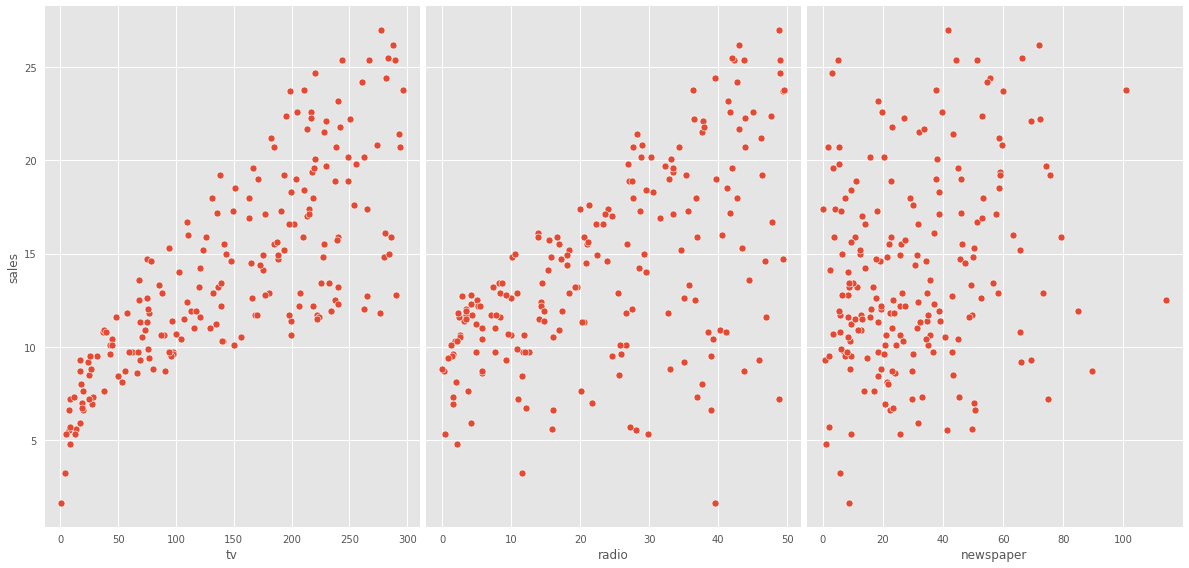

In [24]:
predictors = ['tv', 'radio', 'newspaper']
target = 'sales'
sns.pairplot(data=advert_df, x_vars=predictors, y_vars=target, height=8, aspect=0.7)

<AxesSubplot:>

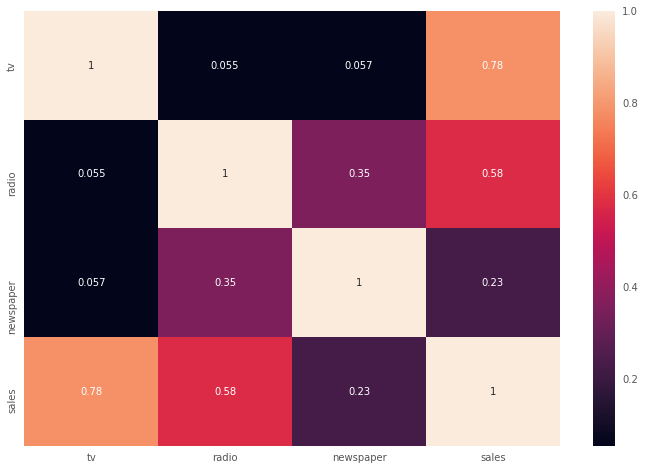

In [25]:
sns.heatmap(advert_df.corr(), annot=True)

* 'tv' and 'sales' have linear relationship
* 'radio' and 'sales' have linear relationship (weaker compared to the 1st pair)
* 'newspaper' and 'sales' non-linear

# Task 4: Multiple Linear Regression - Estimating Coefficients

In [26]:
X = advert_df[predictors]
y = advert_df[target]

lm1 = LinearRegression(fit_intercept=True)
lm1.fit(X, y)

print("Intercept : ", lm1.intercept_)
print("Slopes : ", lm1.coef_)

print("Slopes : ")
print("\t", list(zip(predictors, lm1.coef_)))

Intercept :  2.938889369459412
Slopes :  [ 0.04576465  0.18853002 -0.00103749]
Slopes : 
	 [('tv', 0.0457646454553976), ('radio', 0.18853001691820448), ('newspaper', -0.0010374930424763285)]


In [27]:
sm.OLS(endog=y, 
       exog=sm.add_constant(X)  # equivallent to sklearn fit_intercept
      ).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sat, 24 Apr 2021   Prob (F-statistic):           1.58e-96
Time:                        20:24:22   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.000       2.324       3.554
tv             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Task 5: Model Evaluation Using Train/Test Split and Metric

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors: <h5 align=center>$$\frac{1}{n}\sum_{i=1}^{n} \left |y_i - \hat{y_i} \right |$$</h5>
**Mean Squared Error** (MSE) is the mean of the squared errors: <h5 align=center>$$\frac{1}{n}\sum_{i=1}^{n} (y_i - \hat{y_i})^2$$</h5>
**Root Mean Squared Error** (RMSE) is the mean of the squared errors: <h5 align=center>$$\sqrt{\frac{1}{n}\sum_{i=1}^{n} (y_i - \hat{y_i})^2}$$</h5>

! RMSE pinisher larger errors

In [28]:
def adj_r_squarred(model, X, y):
    return 1 - (1-model.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1)

### Model all predictors

In [29]:
X = advert_df[predictors]
y = advert_df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

lm2 = LinearRegression().fit(X_train, y_train)
lm2_preds = lm2.predict(X_test)

print(f"RMSE \t : {np.sqrt(mean_squared_error(y_test, lm2_preds)):4f}")
print(f"R^2 \t : {r2_score(y_test, lm2_preds):.4f}")
print(f"Adj R^2  : {adj_r_squarred(lm2, X, y):.4f}")

RMSE 	 : 1.404651
R^2 	 : 0.9156
Adj R^2  : 0.8947


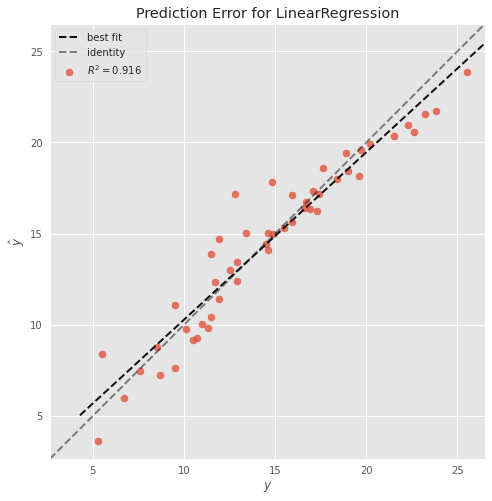

In [30]:
visualizer = PredictionError(lm2).fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof();

### Model without 'newspaper'

In [31]:
X = advert_df[['tv', 'radio']]
y = advert_df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

lm3 = LinearRegression().fit(X_train, y_train)
lm3_preds = lm3.predict(X_test)

print(f"RMSE \t : {np.sqrt(mean_squared_error(y_test, lm3_preds)):4f}")
print(f"R^2 \t : {r2_score(y_test, lm3_preds):.4f}")
print(f"Adj R^2  : {adj_r_squarred(lm3, X, y):.4f}")

RMSE 	 : 1.387903
R^2 	 : 0.9176
Adj R^2  : 0.8956


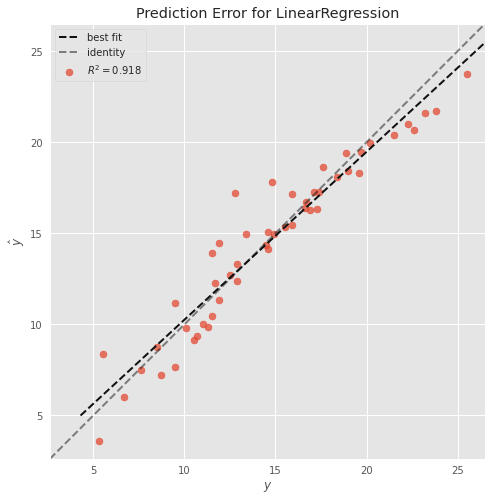

In [32]:
visualizer = PredictionError(lm3).fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof();

#### The second model is better. RMSE is lower while ADJ R^2 is higher

***
Notice that there is still some unexplained variability (the points which are far from the identiti/best fit ??? ). This may be due to non-linearity in the data or synergy effect that we are missing
***


# Task 7: Interaction Effect (Synergy)

***
Linear model with multiplicative assumption (all above were additive). Taking the product of two predictors (TV and radio). This is more realistic for certain datasets (like this one)

**'interaction_tv_radio'** could be interpret as the **increase in the effectivness of the TV advertising for 1 unit increase in radio advertising or vice versa**
***

In [33]:
advert_df['interaction_tv_radio'] = advert_df['tv'] * advert_df['radio'] 

X = advert_df[['tv', 'radio', 'interaction_tv_radio']]
y = advert_df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

lm4 = LinearRegression().fit(X_train, y_train)
lm4_preds = lm4.predict(X_test)

print(f"RMSE \t : {np.sqrt(mean_squared_error(y_test, lm4_preds)):4f}")
print(f"R^2 \t : {r2_score(y_test, lm4_preds):.4f}")
print(f"Adj R^2  : {adj_r_squarred(lm4, X, y):.4f}")

RMSE 	 : 0.701187
R^2 	 : 0.9790
Adj R^2  : 0.9672


In [41]:
output_df = pd.DataFrame({'Observed': y_test, 'Predicted': lm4_preds})
output_df.head(10)

,Observed,Predicted
58,23.8,23.496571
40,16.6,16.153740
34,9.5,8.804125
102,14.8,15.482715
184,17.6,18.080927
198,25.5,26.290537
95,16.9,16.343642
4,12.9,12.647647
29,10.5,9.777317
168,17.1,17.053561


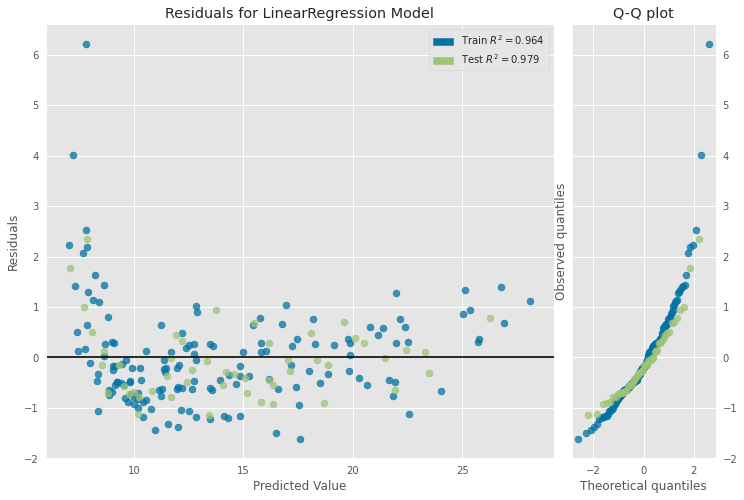

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [45]:
# ResidualsPlot 

visualizer = ResidualsPlot(lm4, hist=False, qqplot=True)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

In [ ]:
visualizer = PredictionError(lm4).fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof();

In [ ]:
sm.OLS(endog=y, 
       exog=sm.add_constant(X)  # equivallent to sklearn fit_intercept
      ).fit().summary()

# VIF (Variance Inflation Factor) / Multicollinearity

1. https://www.statisticshowto.com/variance-inflation-factor/
2. https://statisticalhorizons.com/multicollinearity

***
Variance inflation factors range from 1 upwards. The numerical value for VIF tells you (in decimal form) what percentage the variance (i.e. the standard error squared) is inflated for each coefficient. For example, a VIF of 1.9 tells you that the variance of a particular coefficient is 90% bigger than what you would expect if there was no multicollinearity — if there was no correlation with other predictors.

A rule of thumb for interpreting the variance inflation factor:

*     1 = not correlated.
*     Between 1 and 5 = moderately correlated.
*     Greater than 5 = highly correlated.

Exactly how large a VIF has to be before it causes issues is a subject of debate. What is known is that the more your VIF increases, the less reliable your regression results are going to be. **In general, a VIF above 10 indicates high correlation and is cause for concern. Some authors suggest a more conservative level of 2.5 or above.**

**Sometimes a high VIF is no cause for concern at all. For example, you can get a high VIF by :**

* including products or powers from other variables in your regression, like x and x2. 
* If you have high VIFs for dummy variables representing nominal variables with three or more categories, those are usually not a problem.
* The variables with high VIFs are control variables, and the variables of interest do not have high VIFs

For more details check : https://statisticalhorizons.com/multicollinearity
***

In [ ]:
# the independent variables set
X = advert_df[['tv', 'radio', 'newspaper', 'interaction_tv_radio']]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)